In [16]:
import pandas as pd
import duckdb as db
import seaborn as sns
import matplotlib.pyplot as plt

Membaca data CSV dan menampilkan 5 teratas

In [17]:
data = pd.read_csv('./sales_data.csv')
data.head()

,OrderDate,ProductCategory,CustomerType,TotalSales,Quantity,UnitPrice
0,1/1/2023,Electronics,New,278.52,4,69.63
1,1/2/2023,Clothing,Returning,103.17,8,12.90
2,1/4/2023,Books,New,210.32,6,35.05
3,1/4/2023,Clothing,New,75.63,5,15.13
4,1/5/2023,Electronics,New,211.81,9,23.53


Menampilakn info table, data setiap kolom, cek nilai null dari setiap kolom, dll

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderDate        30 non-null     object 
 1   ProductCategory  30 non-null     object 
 2   CustomerType     30 non-null     object 
 3   TotalSales       30 non-null     float64
 4   Quantity         30 non-null     int64  
 5   UnitPrice        30 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ KB


Visualisasi Analisis Menggunakan Histogram

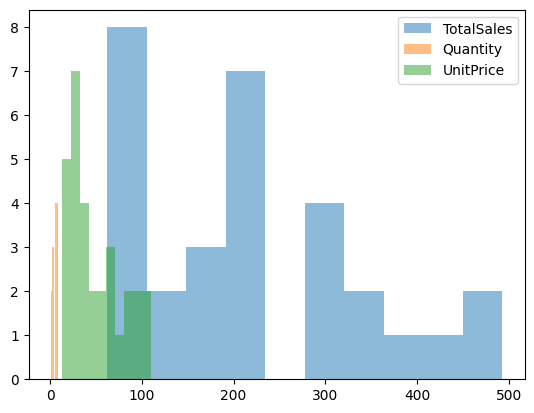

In [31]:
plt.hist(data['TotalSales'], alpha=0.5, label='TotalSales')
plt.hist(data['Quantity'], alpha=0.5, label='Quantity')
plt.hist(data['UnitPrice'], alpha=0.5, label='UnitPrice')
plt.legend();

Statistik Deskriptif

In [20]:
dist_analisis = data[['TotalSales','Quantity','UnitPrice']]

dist_analisis.describe(include="all")

,TotalSales,Quantity,UnitPrice
count,30.000000,30.000000,30.000000
mean,215.941333,5.233333,48.989333
std,124.074028,2.486978,30.265914
min,62.340000,1.000000,12.830000
25%,108.122500,3.000000,24.182500
50%,206.505000,5.000000,38.550000
75%,294.417500,7.000000,68.125000
max,492.730000,9.000000,109.830000


Korelasi antara Total Sales, Quantity, dan Unit Price

In [21]:
coor = dist_analisis.corr()

print(coor)

            TotalSales  Quantity  UnitPrice
TotalSales    1.000000  0.229768   0.590254
Quantity      0.229768  1.000000  -0.555767
UnitPrice     0.590254 -0.555767   1.000000


Membuat HeatMap korelasi antar table

<Axes: >

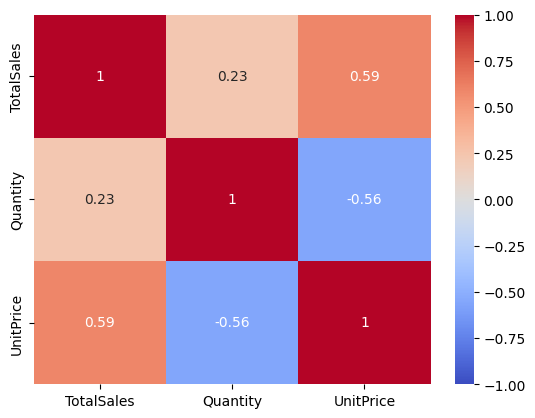

In [22]:
sns.heatmap(coor, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

Menghitung Jumlah, dan memvisualisasikan nya dalam bentuk bar chart

In [23]:
count_value = data[['ProductCategory', 'CustomerType']].value_counts()
print(count_value)

ProductCategory  CustomerType
Electronics      New             9
Books            Returning       7
Clothing         New             5
                 Returning       5
Books            New             3
Electronics      Returning       1
Name: count, dtype: int64


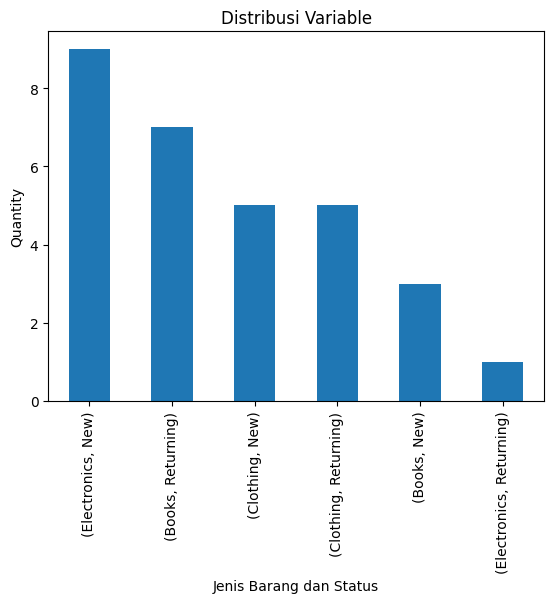

In [24]:
count_value.plot.bar(title = 'Distribusi Variable', xlabel = 'Jenis Barang dan Status', ylabel = 'Quantity')
plt.show()

Analisis Tren Penjualan

In [25]:
import datetime
import dateutil
from dateutil import parser

In [26]:
data['OrderDate'] = data['OrderDate'].map(parser.parse)
data['OrderDate'].head()

0   2023-01-01
1   2023-01-02
2   2023-01-04
3   2023-01-04
4   2023-01-05
Name: OrderDate, dtype: datetime64[ns]

In [27]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderDate        30 non-null     datetime64[ns]
 1   ProductCategory  30 non-null     object        
 2   CustomerType     30 non-null     object        
 3   TotalSales       30 non-null     float64       
 4   Quantity         30 non-null     int64         
 5   UnitPrice        30 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.5+ KB


<Axes: title={'center': 'Analisis Trend Penjualan'}, xlabel='Order Date', ylabel='Unit Price'>

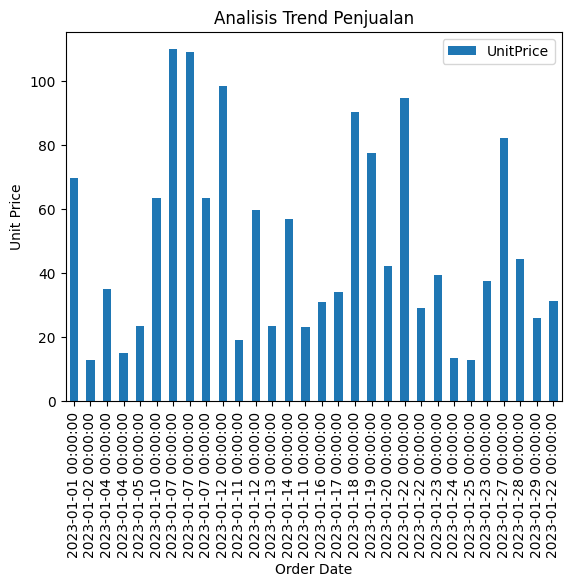

In [28]:
data.plot.bar('OrderDate', 'UnitPrice', title = 'Analisis Trend Penjualan', xlabel = 'Order Date', ylabel = 'Unit Price')

Identifikasi Outlier 'TotalSales' dan 'UnitPrice'

<Axes: >

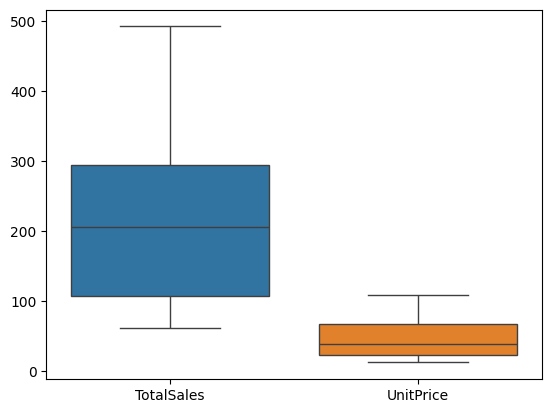

In [29]:
iden_outlier = data[['TotalSales', 'UnitPrice']]
sns.boxplot(data = iden_outlier)